# PHYS 512 - Problem Set 4

**André Vallières (260742187)**

## Problem 1

Shifting an array is equivalent to replacing each element by another element separated by a constant offset. This translates to a convolution with a delta function centered at the desired offset:
\begin{align}
f[n + \alpha] = \sum_{m=-\infty}^\infty f[m] \delta[m - (n + \alpha)] = f[n] \circledast \delta[n + \alpha]
\end{align}

For a cyclic function (such as shifting an array), we have
\begin{align}
f[n + \alpha] = \sum_{m=0}^{N - 1} f[m] \delta[(m - (n + \alpha))_{\hspace{-0.5em} \mod N}]
\end{align}

since $f[n] \neq 0$ only for $0 \leq n \leq N - 1$, where $N$ is the length of the array.

In [3]:
import matplotlib.pyplot as plt
import numpy as np

In [13]:
def delta(n):
    """
    Returns delta(n)
    """
    if n == 0:
        return 1
    
    return 0

def shift_arr(arr, off):
    """
    Returns array `arr` shifted to the left by offset `off`
    """
    N = arr.shape[0]
    shifted_arr = np.zeros(N)
    
    # For each element of the array
    for i in range(N):
        # Run convolution to find value at this point (useless!)
        s = 0
        for m in range(N):
            s += arr[m] * delta((m - (i + off)) % N)
        shifted_arr[i] = s
        
    return shifted_arr

In [22]:
def gaussian(x, mu, sig):
    """
    Returns Gaussian
    """
    return np.exp(-np.power(x - mu, 2) / (2 * sig**2))

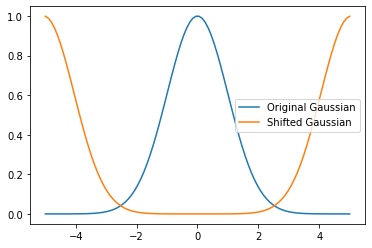

In [304]:
# Length of array
N = 100

# Original Gaussian
x = np.linspace(-5, 5, N)
f = gaussian(x, 0, 1)

# Shift it
shifted_f = shift_arr(f, N//2)

# Plot
plt.plot(x, f)
plt.plot(x, shifted_f)
plt.legend(['Original Gaussian', 'Shifted Gaussian'])
plt.show()

## Problem 2

In [353]:
def bad_corr(f, g):
    """
    Returns correlation function of `f` and `g`, assuming real (negative frequencies on the right).
    """
    return np.fft.irfft(np.fft.rfft(f) * np.conj(np.fft.rfft(g)))

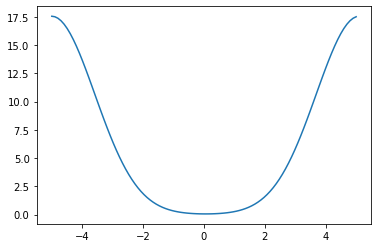

In [354]:
# Plot correlation function of a Gaussian with itself
corr_f_f = bad_corr(f, f)

plt.plot(x, corr_f_f)
plt.show()

## Problem 3

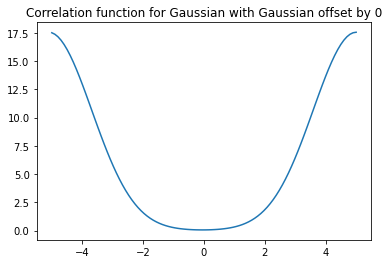

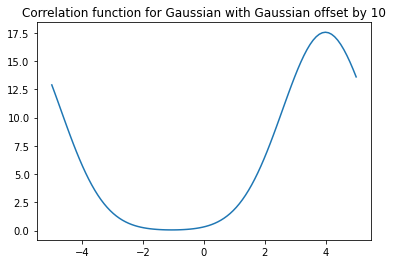

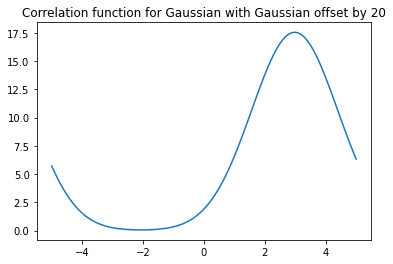

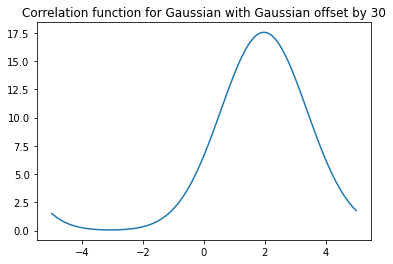

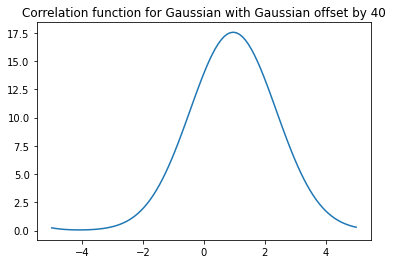

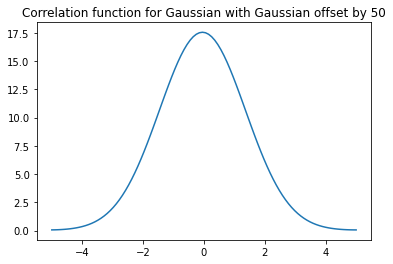

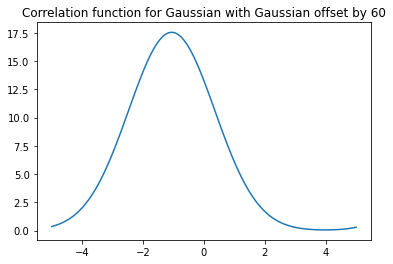

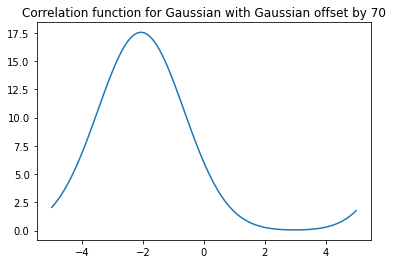

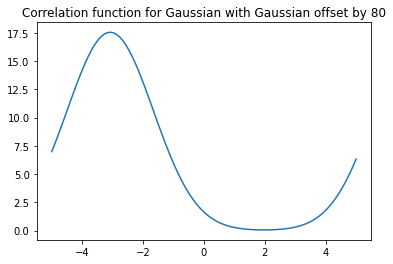

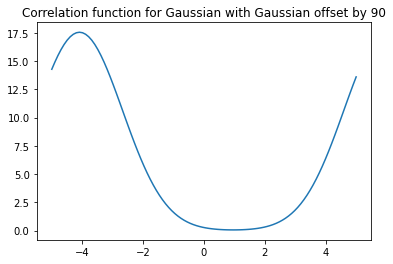

In [347]:
offsets_len = 10
offsets = [i * N//offsets_len for i in range(offsets_len)]

for off in offsets:
    # Compute shifted Gaussian and correlation
    shifted_f = shift_arr(f, off)
    corr_f_shifted_f = bad_corr(f, shifted_f)
    
    # Plot
    plt.plot(x, corr_f_shifted_f)
    plt.title('Correlation function for Gaussian with Gaussian offset by %d' % off)
    plt.show()

The results are not what we should expect from a normal correlation function. Indeed, looking at $x = 0$, the correlation is the highest when the offset is half the length of the array, and the lowest when the offset 0; we expect the opposite result. This is because computing the FFT essentially causes the left part of the expected plot (i.e., negative frequencies) be shifted to the right due to the wrap-around effect. To solve this issue, we can simply use np.fft.fftshift to place the negative frequency components to where they should be.

## Problem 4

In [362]:
def good_conv(f, g):
    """
    Returns convolution function of `f` and `g`, assuming real, (negative frequencies on the left).
    """
    # Get length
    N = f.shape[0]
    
    # Pad with zeros
    f = np.pad(f, (0, N))
    g = np.pad(g, (0, N))
    
    # Compute product of FFTs (discarding padding)
    fft = (np.fft.rfft(f) * np.fft.rfft(g))[::2]
    
    # Return result
    return np.fft.fftshift(np.fft.irfft(fft))

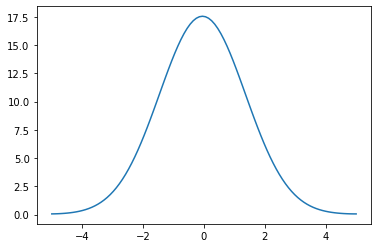

In [363]:
# Plot convolution function of a Gaussian with itself
conv_f_f = good_conv(f, f)

plt.plot(x, conv_f_f)
plt.show()

## Problem 5

### a)

We simply use
\begin{align}
\sum_{x = 0}^{N-1} r^x = \frac{1 - r^N}{1 - r}
\end{align}

where we have $r = e^{-2 \pi i k/N}$. This gives
\begin{align}
\sum_{x = 0}^{N-1} e^{-2 \pi i k x/N} = \sum_{x = 0}^{N-1} \Big( e^{-2 \pi i k /N} \Big)^x = \frac{1 - (e^{-2 \pi i k / N})^N}{1 - e^{-2 \pi i k/N}} = \frac{1 - e^{-2 \pi i k}}{1 - e^{-2 \pi i k/N}}
\end{align}

### b)

As $k \rightarrow 0$, we have $r = 1$, thus
\begin{align}
\lim_{k \rightarrow 0} \sum_{x = 0}^{N-1} e^{-2 \pi i k x/N} = \sum_{x = 0}^{N-1} 1^x = \sum_{x = 0}^{N-1} 1= N
\end{align}

Now, let $k = \kappa N + \epsilon$ where $\kappa, \epsilon \in \mathbb{Z}$. Then,
\begin{align}
\sum_{x = 0}^{N-1} e^{-2 \pi i k x/N} = \sum_{x = 0}^{N-1} e^{-2 \pi i (\kappa N + \epsilon) x/N} = \sum_{x = 0}^{N-1} e^{-2 \pi i \kappa x} e^{-2 \pi i \epsilon x / N} = \sum_{x = 0}^{N-1} e^{-2 \pi i \epsilon x / N}
\end{align}

We see that if $k$ is a multiple of $N$, then $\epsilon = 0$ and get the the result above, that the sum is $N$. However, if $k$ is not a multiple of $N$, then $\epsilon \neq 0$, thus the sum defines the sum of vectors turning around a circle in the imaginary plane, and, as shown in class, this is $0$.

### c)

Let $s[n] = \sin(2 \pi f n / f_s) = \sin(2 \pi k n / N)$ where $f_s$ is the sampling frequency, $k$ is the wavenumber and $N \in \mathbb{N}$ is the DFT length. Then
\begin{align}
S[q] = \mathcal{F}\{ s[n] \} &= \sum_{n = 0}^{N-1} \sin(2 \pi k n / N) e^{-2 \pi i q n / N} \\
&= \frac{1}{2 i} \sum_{n = 0}^{N-1} \big(e^{2 \pi i k n / N} - e^{-2 \pi i k n / N} \big) e^{-2 \pi i q n / N} \\
&= \frac{1}{2 i} \Big[ \sum_{n = 0}^{N-1} e^{-2 \pi i (q - k) n / N} - \sum_{n = 0}^{N-1} e^{-2 \pi i (q + k) n / N} \Big] \\
&= \frac{e^{-i \pi /2}}{2} \Big[ \sum_{n = 0}^{N-1} e^{-2 \pi i (q - k) n / N} - \sum_{n = 0}^{N-1} e^{-2 \pi i (q + k) n /N} \Big]
\end{align}

From 5b), for $k \in \mathbb{N}$ then
\begin{align}
S[q] = \frac{e^{-i \pi /2}}{2} \Big[ \sum_{n = 0}^{N-1} e^{-2 \pi i (q - k) n / N} - \sum_{n = 0}^{N-1} e^{-2 \pi i (q + k) n / N} \Big] =
\begin{cases}
\frac{N e^{-i \pi /2}}{2} & q = k\\
\frac{N e^{i \pi /2}}{2} & q = -k
\end{cases}
\end{align}

No spectral leakage! In other words, the frequency of the sine wave corresponds to a single wavenumber in discrete Fourier space, thus the function would be represented by (two) delta functions. 

However, for $k \notin \mathbb{N}$, then the above sum does not simplify and we get spectral leakage: the delta functions will be smeared out due to non-integer $k$. This could be fixed by decreasing the sampling frequency or/and increasing the DFT length, which would both decrease the spectral resolution (hence better resolution).

In [407]:
def sin_dft(k, N):
    """
    Computes DFT[sin(2 * pi * k * n / N)] for arbitrary `k`.
    """
    n = np.arange(N)
    q = n.reshape((N, 1))

    M = (1 / 2J) * (np.exp(-2J * np.pi * (q - k) * n / N) - np.exp(-2J * np.pi * (q + k) * n / N))
    
    return np.sum(M, axis=1)

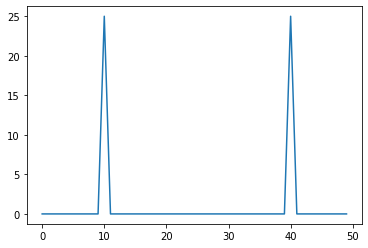

In [408]:
# Integer k
k = 10 # Frequency bin
N = 50 # DFT length

plt.plot(np.abs(sin_dft(k, N)))
plt.show()

No spectral leakage! The $k$ value being an integer means the frequency of the sine wave will be mapped to a single (positive) frequency bin in discrete Fourier space. We can observe the negative frequency at $N - k = 50 - 10 = 40$.

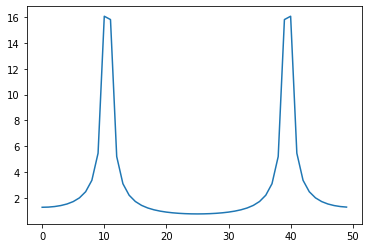

In [409]:
# Non-integer k
k = 10.5 # Frequency bin
N = 50 # DFT length

plt.plot(np.abs(sin_dft(k, N)))
plt.show()

Spectral leakage! :( Since the frequency cannot be mapped to a single frequency bin, the neighbour frequency bins around $k = 10.5$ pick up some power such that the shape is a smeared delta function.

We can show that our DFT works correctly by comparing to numpy's implementation.

In [410]:
# Own
own_dft = sin_dft(k, N)

# Numpy
n = np.arange(N)
y = np.sin(2 * np.pi * k * n / N)
np_dft = np.fft.fft(y)

# Compare
print("Error:", np.std(np_dft - own_dft))

Error: 4.003700743939341e-14


Good! :)

### d)

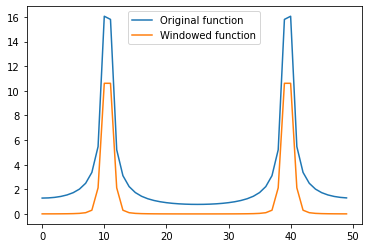

In [423]:
# Function
k = 10.5
N = 50
n = np.arange(N)
y = np.sin(2 * np.pi * k * n / N)

# Window
w = 0.5 - 0.5 * np.cos(2 * np.pi * n / N)

# Multiply them
w_y = w * y

# Compute FFTs
fft_orig = np.fft.fft(y)
fft_window = np.fft.fft(w_y)

# Plot
plt.plot(np.abs(fft_orig))
plt.plot(np.abs(fft_window))
plt.legend(['Original function', 'Windowed function'])
plt.show()

We can see how spectral leakage is decreased for the orange curve (i.e., the spikes are more centerered around 10.5).

### e)

Analytically, we have, with $w[n] = 0.5 - 0.5 \cos(2\pi n / N)$

\begin{align}
W[k] &= \sum_{n=0}^{N-1} \big[ 0.5 - 0.5 \cos(2\pi n / N) \big] e^{-2 \pi i k n / N}\\
&= \sum_{n=0}^{N-1} \Big[ \frac{1}{2} - \frac{1}{4} \big( e^{2 \pi i n/N} + e^{-2 \pi i n/N} \big) \Big] e^{-2 \pi i k n / N}\\
&= \sum_{n=0}^{N-1} \Big[ \frac{1}{2} e^{-2 \pi i k n / N} - \frac{1}{4} e^{-2 \pi i (k - 1) / N} + - \frac{1}{4} e^{-2 \pi i (k + 1) / N} \Big]\\
&= 
\begin{cases}
\frac{N}{2} & k = 0\\
-\frac{N}{4} & k = \pm 1\text{ (or } k = 1, N-1\text{)}\\
0 & \text{otherwise}
\end{cases}
\end{align}

We can run some code to verify this.

In [374]:
def hann(n, N):
    return 0.5 - 0.5 * np.cos(2 * np.pi * n / N)

N = 10
nn = np.arange(N)
hann_w = hann(nn, N)
np.real(np.fft.fft(hann_w))

array([ 5.00000000e+00, -2.50000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -9.02056208e-17,  0.00000000e+00, -3.12250226e-16,
        0.00000000e+00, -2.50000000e+00])

Next, let's prove that we can get the windowed Fourier transform by appropriate combinations of each point in the unwindowed Fourier transform and its immediate neighbors:

\begin{align}
\mathcal{F}\{y[n] w[n]\}[k] &= \frac{1}{N} Y[k] \circledast W[k]\\
&= \frac{1}{N} Y[k] \circledast \Big( \frac{N}{2} \delta [k] - \frac{N}{4} \delta [k - 1] - \frac{N}{4} \delta [k + 1] \Big)\\
&= \sum_{m = 0}^{N-1} Y[(k - m)_{\hspace{-0.5em} \mod N}] \Big( \frac{1}{2} \delta [m] - \frac{1}{4} \delta [m - 1] - \frac{1}{4} \delta [m + 1] \Big)\\
&= \frac{1}{2} Y[k] - \frac{1}{4} Y[(k - 1)_{\hspace{-0.5em} \mod N}] - \frac{1}{4} Y[(k + 1)_{\hspace{-0.5em} \mod N}]
\end{align}

Let's verify this.

In [399]:
def windowed_fft(y):
    N = y.shape[0]
    fft = np.fft.fft(y)
    
    wfft = np.zeros(N, dtype='complex')
    for k in range(N):
        wfft[k] = (0.5 * fft[k] - 0.25 * fft[(k - 1) % N] - 0.25 * fft[(k + 1) % N])
    
    return wfft

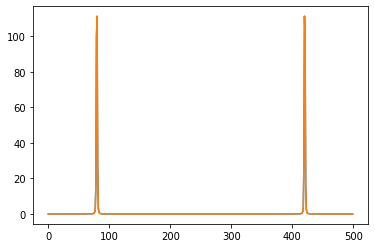

Difference between our approach and numpy's: 2.656336412167271e-15


In [424]:
N = 500
n = np.linspace(0, N - 1, N)
y = np.sin(x)

wy = hann(n, N) * y

fft_own = np.abs(windowed_fft(y))
fft_np = np.abs(np.fft.fft(wy))

plt.plot(fft_own)
plt.plot(fft_np)
plt.show()

print("Difference between our approach and numpy's:", np.std(fft_own - fft_np))